In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Set seaborn style
sns.set(style="whitegrid")


 2. Load data

In [21]:
df = pd.read_csv("data.csv")

 3. Drop rows with missing values in relevant columns
 

In [22]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'liveness', 'loudness', 'speechiness', 'tempo']
df = df.dropna(subset=features + ['valence'])

In [23]:
print(df.columns.tolist())


['id', 'name', 'artists', 'duration_ms', 'release_date', 'year', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode', 'key', 'popularity', 'explicit']


4. Convert valence to mood class (0 = sad, 1 = happy)

In [24]:
df['mood'] = (df['valence'] >= 0.5).astype(int)

 5. Feature correlation heatmap

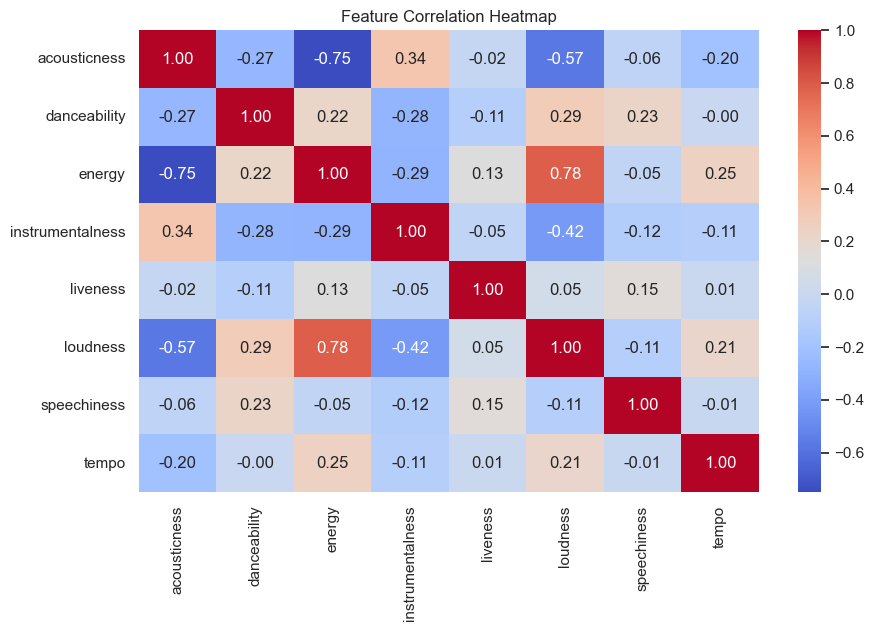

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

 6. Visualize mood distribution

C:\Users\Divyansh\AppData\Local\Temp\ipykernel_8508\2116325754.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mood', data=df, palette='Set2')


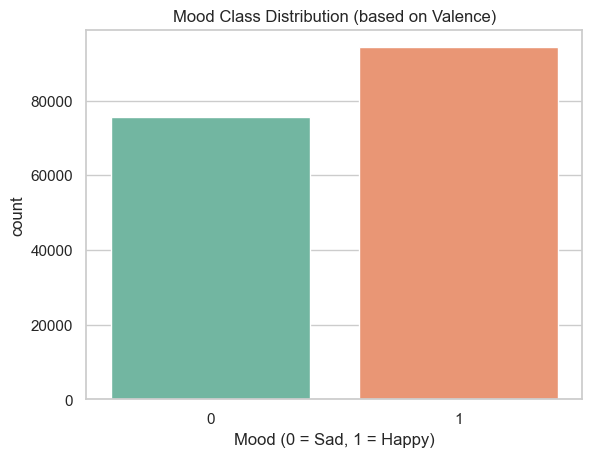

In [31]:
sns.countplot(x='mood', data=df, palette='Set2')
plt.title("Mood Class Distribution (based on Valence)")
plt.xlabel("Mood (0 = Sad, 1 = Happy)")
plt.show()


7. Prepare data

In [26]:
X = df[features]
y = df['mood']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


8. Train logistic regression

In [27]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


9. Evaluate model

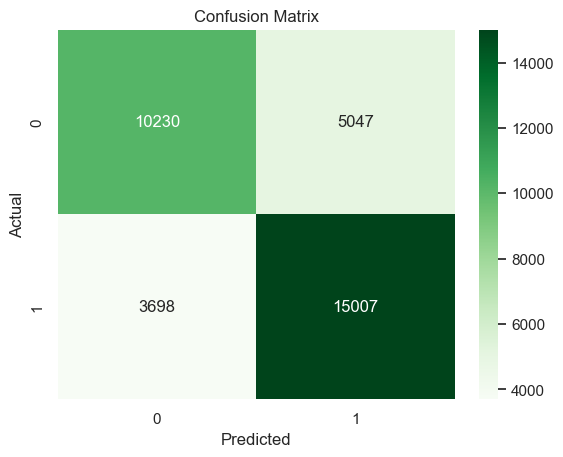

In [28]:
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70     15277
           1       0.75      0.80      0.77     18705

    accuracy                           0.74     33982
   macro avg       0.74      0.74      0.74     33982
weighted avg       0.74      0.74      0.74     33982



10. To save the model

In [30]:
joblib.dump(model, "model_predicted.pkl")
print("✅ Model trained and saved as 'model_predicted.pkl'")

✅ Model trained and saved as 'model_predicted.pkl'
